<a href="https://colab.research.google.com/github/prathameshbelurkar/Practical-Guide-to-TensorFlow/blob/neural-network-regression/01_neural_network_regression_with_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [1]:
# Import TensorFlow
import tensorflow as tf 
print(tf.__version__)

2.9.2


## Creating data to view and fit 

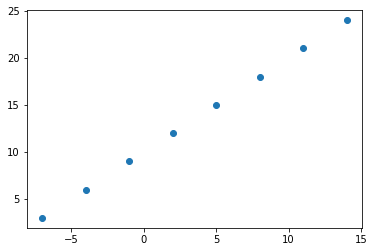

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

# Create features 
X = np.array([-7., -4., -1., 2., 5., 8., 11., 14.])

# Create labels 
y = np.array([3., 6., 9., 12., 15., 18., 21., 24.])

# Visualize it 
plt.scatter(X, y);

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shapes 

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0] ,y[0]

(-7.0, 3.0)

In [6]:
X[1], y[1]

(-4.0, 6.0)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [8]:
X[0].ndim

0

In [9]:
X[0], y[0]

(-7.0, 3.0)

In [10]:
# Turn our NumPy arrays into tensors 
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

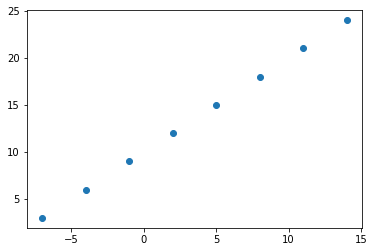

In [12]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and outpit layers, as well as hidden layers of a deep learning model
2. **Compile a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting our model** - letting the model try to find patterns between X and y (features and labels)

In [13]:
# Set random seed 
tf.random.set_seed(42)

# 1. Create a model using sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model 
model.compile(loss=tf.keras.losses.mae, # mae: mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD: stochastic gradient descent 
              metrics=["mae"]) 

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 892ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 17ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 15ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 19ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 21ms/step - loss: 10.9748 - mae: 10.9748


In [14]:
# Check out X and y 
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
# Try and make prediction using our model 
y_pred = model.predict([17.])
y_pred

1/1 [==============================] - 0s 223ms/step


array([[12.716021]], dtype=float32)

In [16]:
y_pred + 11

array([[23.71602]], dtype=float32)

## Improving our model

We can improve the model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add layers, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimiation function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from). 

In [27]:
# Let's rebuild our model

# 1. Create the model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model 
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for the longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 263ms/step - loss: 14.2813 - mae: 14.2813
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 14.1488 - mae: 14.1488
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 14.0163 - mae: 14.0163
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 13.8838 - mae: 13.8838
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 13.7513 - mae: 13.7513
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 13.6188 - mae: 13.6188
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 13.4863 - mae: 13.4863
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 13.3538 - mae: 13.3538
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 13.2213 - mae: 13.2213
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 13.0888 - mae: 13.0888
Epoch 11/100
1/1 [==============================] - 0s 7m

In [22]:
# Remind ourselves of the data 
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [23]:
# Let's see our model's prediction is improved 
model.predict([17.0])

1/1 [==============================] - 0s 83ms/step


array([[29.739855]], dtype=float32)